<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>

# CIFAR10 Image Classification

Faisal Qureshi   
Professor    
Faculty of Science    
Ontario Tech University    
Oshawa ON Canada    
http://vclab.science.ontariotechu.ca

## Copyright information

&copy; Faisal Qureshi

# Acknowledgements

Taken from [https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## License

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

# Introduction

The purpose of this lab is to study image classification.  Specifically, we will attempt to classify [CIFAR10 datasets](https://www.cs.toronto.edu/~kriz/cifar.html) using a Multilayer Perceptron (MLP).  We will use PyTorch to train this model.

The code provided below trains and evaluates a $10$-way linear classifier, i.e., it takes all the pixels of a CIFAR10 image (across three channels)--$32 \times 32 \times 3$--and fits $10$ lines, one for each class, to it.  The figure shown below capture this model.

<center>
    <img src="04-image-classification/10-way-linear-classifier.png" width="70%">
</center>

# Tasks

The goal of the lab is three-folds.

1. Understand how PyTorch is being used to setup a model.
2. Capture the performance of this linear model on the problem of image classification.
3. Convert the linear model to a Multi-layer Perceptron Model (MLP) and compare the performance of the two models.
    - I suggest that you start with a model with a single hidden layer.  The hidden layer will have an activation function, say ReLU.  The output layer will take the hidden layer and outputs $10$ values.  
5. (Optional) what other changes can you make to the image to improve classification scores. 

# Sample Code

In [23]:
import torch
import torchvision
import torchvision.transforms as transforms

In [24]:
# GPU usage
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [25]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [26]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


In [27]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [28]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

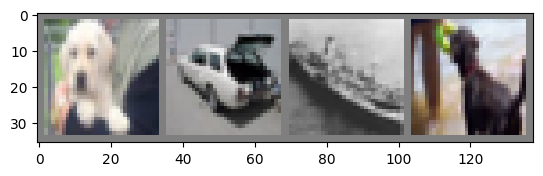

dog   car   ship  dog  


In [31]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 10-way linear model

In [32]:
import torch.nn as nn
import torch.nn.functional as F

class ALinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(32*32*3, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc(x)
        return x

linear_model = ALinearModel()

## MLP model (TO DO)

In [35]:
class MyMLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        # TODO
        
    def forward(self, x):
        # TODO
        
        return torch.zeros((1,10))

## Training

In [33]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [34]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0], data[1]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = linear_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.361
[1,  4000] loss: 2.352
[1,  6000] loss: 2.361
[1,  8000] loss: 2.366
[1, 10000] loss: 2.364
[1, 12000] loss: 2.364
[2,  2000] loss: 2.360
[2,  4000] loss: 2.361
[2,  6000] loss: 2.366
[2,  8000] loss: 2.360
[2, 10000] loss: 2.359
[2, 12000] loss: 2.364
Finished Training


## Saving Model

In [36]:
PATH = './cifar_linear_model.pth'
torch.save(linear_model.state_dict(), PATH)

## Inference on a test images

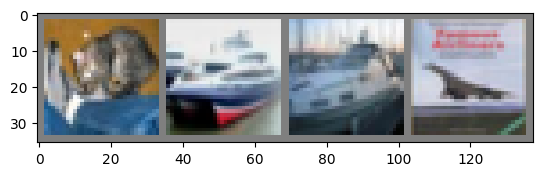

GroundTruth:  cat   ship  ship  plane


In [37]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [38]:
linear_model = ALinearModel()
linear_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [40]:
outputs = linear_model(images)

In [41]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  deer  dog   plane ship 


## Computing accuracy on the entire test set

In [42]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = linear_model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 8 %


## Computing class-wise accuracy on the entire test set 

In [43]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = linear_model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 26.2 %
Accuracy for class: car   is 4.4 %
Accuracy for class: bird  is 8.8 %
Accuracy for class: cat   is 4.8 %
Accuracy for class: deer  is 4.6 %
Accuracy for class: dog   is 12.4 %
Accuracy for class: frog  is 5.1 %
Accuracy for class: horse is 5.6 %
Accuracy for class: ship  is 5.6 %
Accuracy for class: truck is 8.3 %


# What to submit

1. Python notebook that implements multilayer perceptron model.
2. A report that lists the classification performance of the linear and MLP model.
3. (Optional) Python notebook that implements some of the changes that you have made to the model that improves the classification scores.

All work should be submitted to Canvas.

<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>